Head of train_dataset.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

KeyboardInterrupt: 

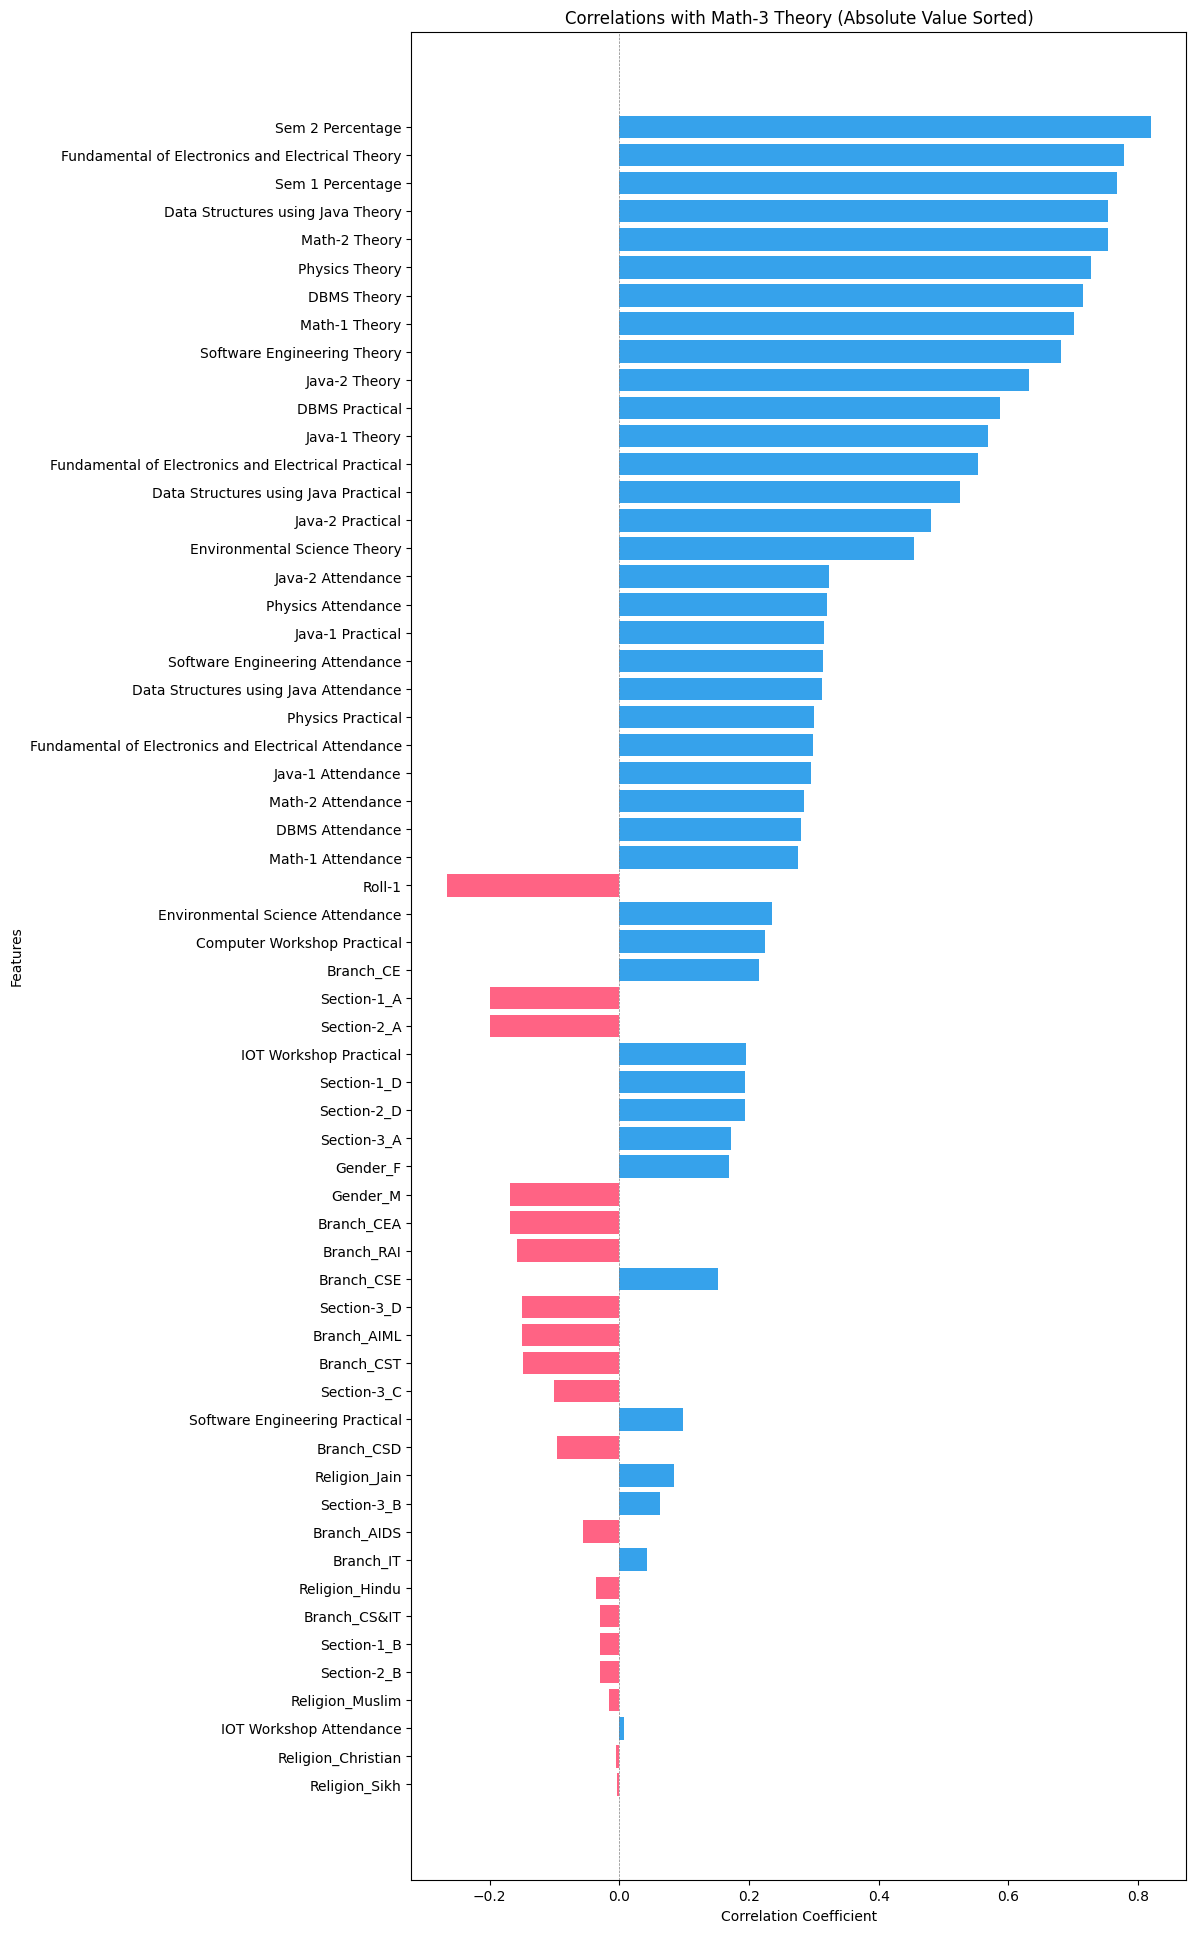

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]


# Print the first 5 rows
print("Head of train_dataset.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with Math-3 Theory
for col in numeric_cols:
    if col != 'Math-3 Theory' :  # Exclude the target itself, mentor columns
        corr = df[col].corr(df['Math-3 Theory'])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch','Section-1', 'Section-2', 'Section-3']:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df['Math-3 Theory'])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if 'Roll-1' in df.columns:
    corr = df['Roll-1'].astype(float).corr(df['Math-3 Theory'])
    correlations['Roll-1'] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print sorted correlations
print("\nCorrelations with Math-3 Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, max(8, len(labels) * 0.4)))  # Adjust height based on number of features
plt.barh(labels[::-1], values[::-1], color=np.where(np.array(values[::-1]) >= 0, '#36A2EB', '#FF6384'))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlations with Math-3 Theory (Absolute Value Sorted)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of math_train_data.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Wo

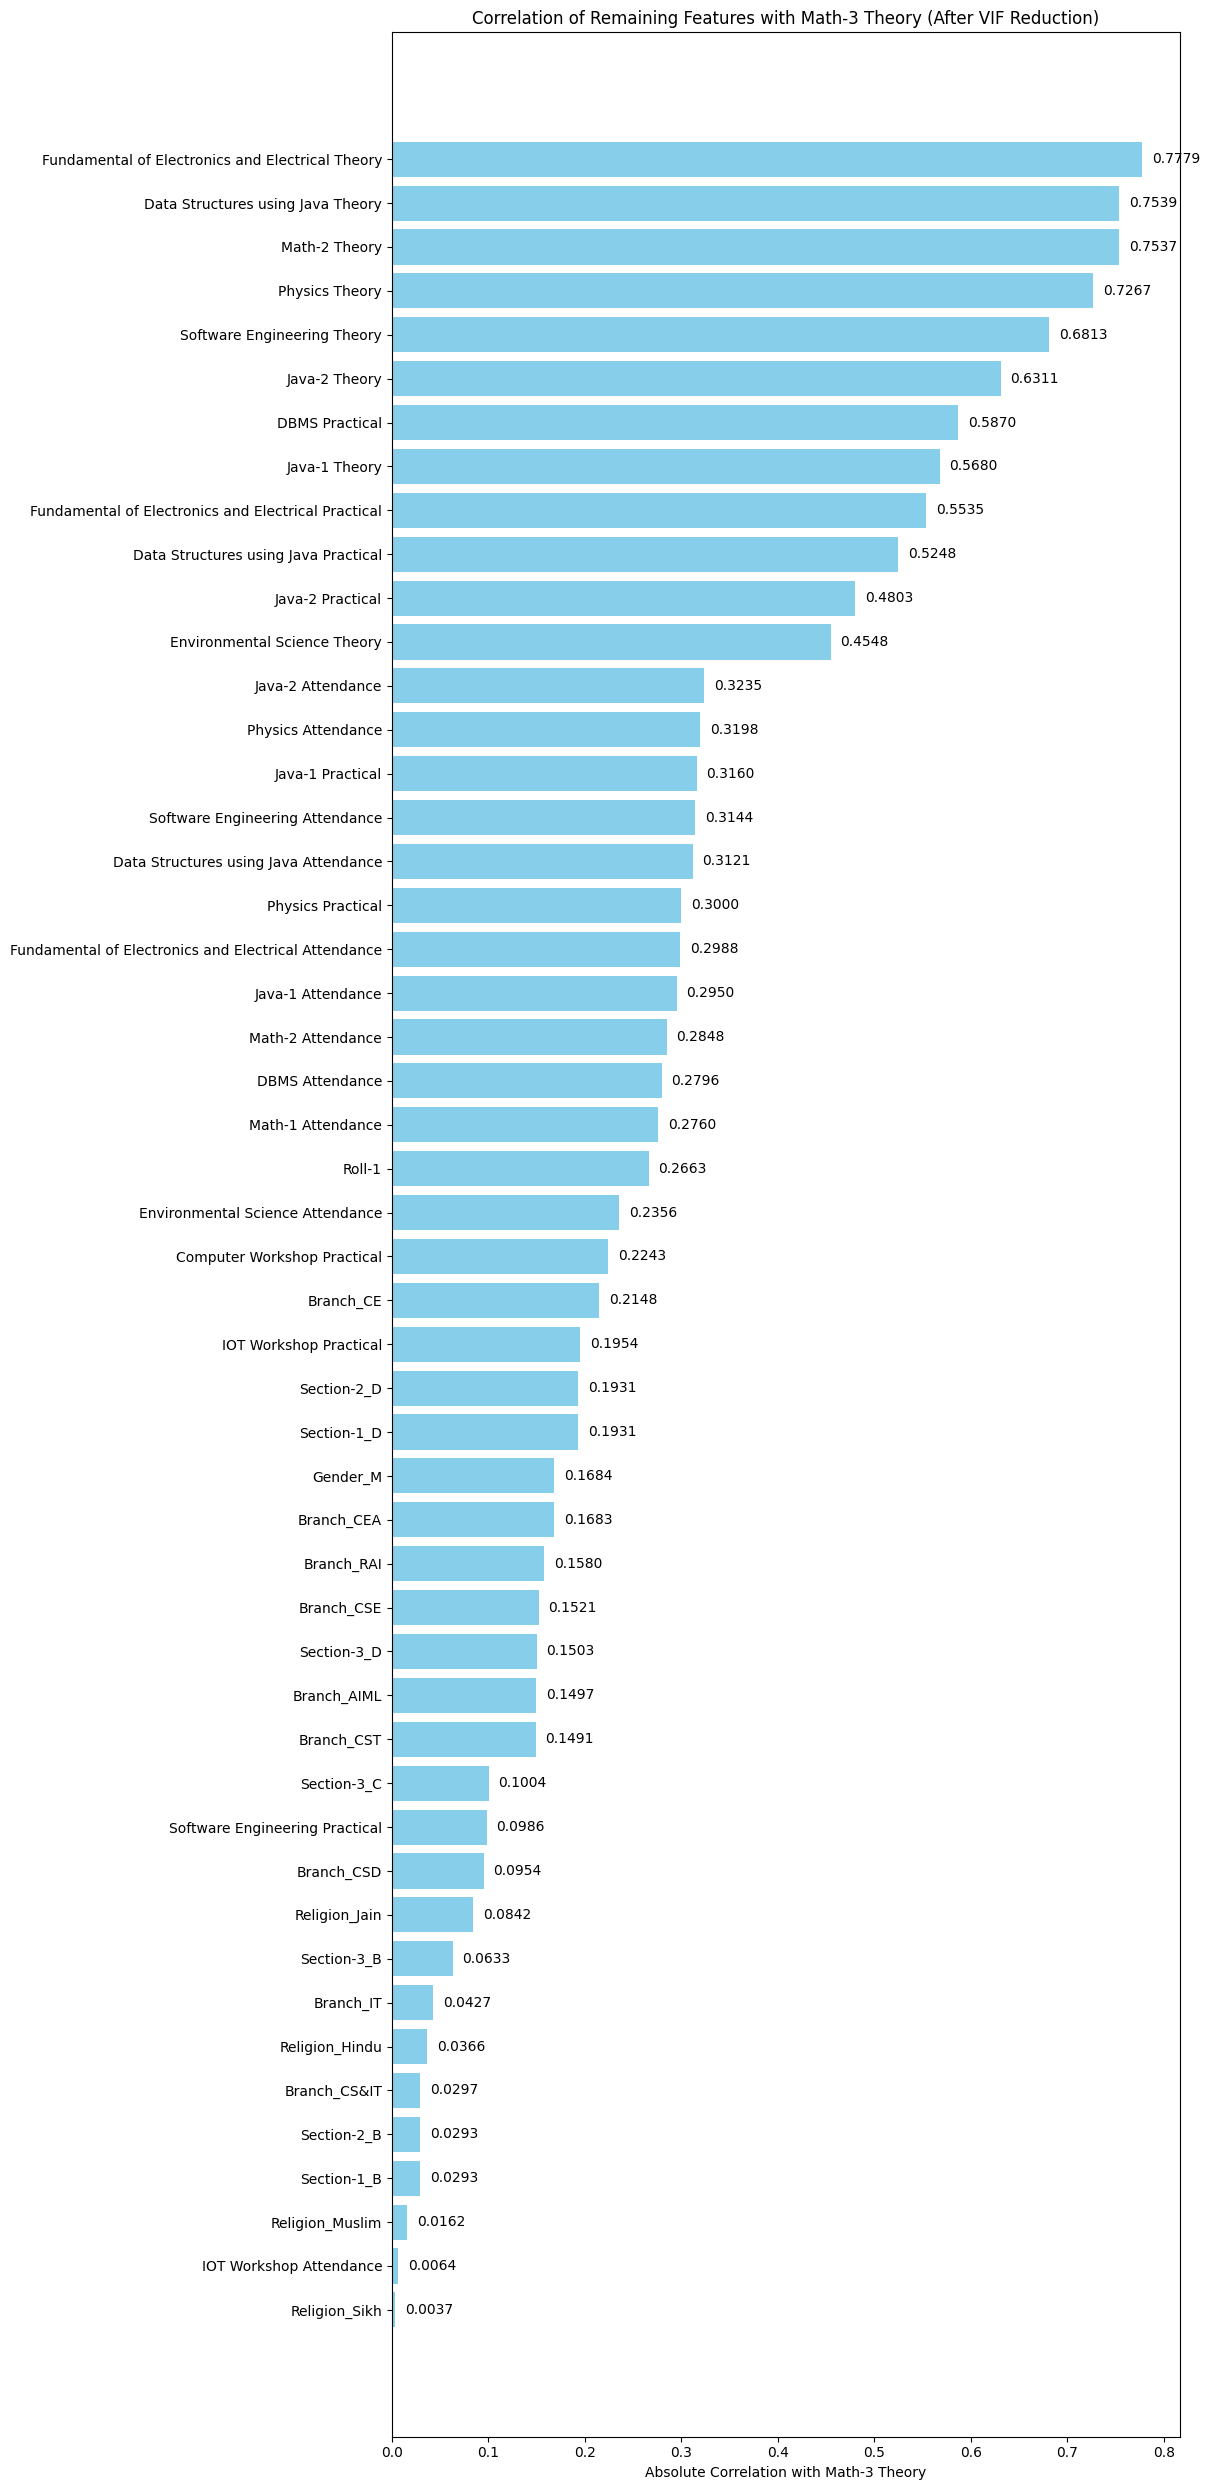


Final selected features (excluding target):
['Roll-1', 'Physics Theory', 'Physics Practical', 'Java-1 Theory', 'Java-1 Practical', 'Software Engineering Theory', 'Software Engineering Practical', 'Environmental Science Theory', 'IOT Workshop Practical', 'Computer Workshop Practical', 'Math-2 Theory', 'Data Structures using Java Theory', 'Data Structures using Java Practical', 'DBMS Practical', 'Fundamental of Electronics and Electrical Theory', 'Fundamental of Electronics and Electrical Practical', 'Java-2 Theory', 'Java-2 Practical', 'Math-1 Attendance', 'Physics Attendance', 'Java-1 Attendance', 'Software Engineering Attendance', 'Environmental Science Attendance', 'IOT Workshop Attendance', 'Math-2 Attendance', 'Data Structures using Java Attendance', 'DBMS Attendance', 'Fundamental of Electronics and Electrical Attendance', 'Java-2 Attendance', 'Gender_M', 'Religion_Hindu', 'Religion_Jain', 'Religion_Muslim', 'Religion_Sikh', 'Branch_AIML', 'Branch_CE', 'Branch_CEA', 'Branch_CS&IT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Ensure plots display inline in Jupyter Notebook
# %matplotlib inline # This line is for Jupyter Notebook, will cause error if run as a script

# Read the math train data
try:
    df = pd.read_csv('../train_dataset.csv')
except FileNotFoundError:
    print("Error: 'train_dataset.csv' not found. Please ensure the file path is correct.")
    exit()


# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    if section in df.columns: # Check if column exists
        df[section] = df[section].astype(str).str[0] # Ensure it's string type before .str accessor

# Print the first 5 rows
print("Head of math_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame for VIF calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']:
        try:
            encoded = pd.get_dummies(df[col], prefix=col, drop_first=True) # drop_first to avoid perfect multicollinearity
            df_encoded = pd.concat([df_encoded, encoded], axis=1)
            df_encoded = df_encoded.drop(columns=[col])
        except Exception as e:
            print(f"Could not encode column {col}: {e}")


# Ensure all columns are numeric for VIF calculation and handle potential NaNs
df_for_vif = df_encoded.drop(columns=['Math-3 Theory'], errors='ignore').copy()
df_for_vif = df_for_vif.select_dtypes(include=[np.number]) # Select only numeric columns
df_for_vif = df_for_vif.fillna(df_for_vif.mean()) # Fill NaNs with mean, or choose another strategy

# Add constant for VIF calculation if not already present (VIF expects an intercept)
# However, VIF is typically calculated on the independent variables.
# If 'Math-3 Theory' is your target, you calculate VIF on the features.
X_vif = df_for_vif.copy()

# Check if 'Math-3 Theory' is in the original df_encoded to calculate correlations later
target_variable = 'Math-3 Theory'
if target_variable not in df_encoded.columns:
    print(f"Warning: Target variable '{target_variable}' not found in df_encoded. Correlations with target cannot be computed.")
    correlations_with_math = {}
else:
    # 1. Create dictionary of absolute correlations with Math-3 Theory
    correlations_with_math = {}
    for col in df_encoded.columns:
        if col != target_variable and pd.api.types.is_numeric_dtype(df_encoded[col]): # Ensure column is numeric
            try:
                corr = abs(df_encoded[col].corr(df_encoded[target_variable]))
                correlations_with_math[col] = corr
            except Exception as e:
                print(f"Could not calculate correlation for {col} with {target_variable}: {e}")
        elif col != target_variable:
            print(f"Skipping non-numeric column {col} for correlation with {target_variable}.")


# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with Math-3 Theory:")
if correlations_with_math:
    for col, corr in sorted(correlations_with_math.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {corr:.4f}")
else:
    print("No correlations to display.")

# --- VIF Calculation ---
print("\nCalculating VIF...")
# Add constant term for VIF calculation (intercept) if your model will have one.
# VIF is calculated on the independent variables.
X_vif_const = add_constant(X_vif, has_constant='add') # Adds a constant column for intercept

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_data = vif_data[vif_data["feature"] != 'const'] # Remove const VIF
print("\nInitial VIF values:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Iteratively remove features with VIF > threshold (e.g., 5 or 10)
threshold_vif = 10
columns_to_drop_vif = []
features_for_vif_iter = X_vif.copy() # Start with all features (excluding target)

while True:
    if features_for_vif_iter.empty or features_for_vif_iter.shape[1] < 2: # Need at least 2 features for VIF
        print("\nNot enough features to calculate VIF or all high VIF features removed.")
        break

    # Add constant for VIF calculation in each iteration
    temp_X_vif_const = add_constant(features_for_vif_iter, has_constant='add')
    
    vif_iter = pd.DataFrame()
    vif_iter["feature"] = temp_X_vif_const.columns
    try:
        vif_iter["VIF"] = [variance_inflation_factor(temp_X_vif_const.values, i) for i in range(temp_X_vif_const.shape[1])]
    except Exception as e: # Catch potential errors like singular matrix
        print(f"Error calculating VIF: {e}. Stopping VIF reduction.")
        break

    vif_iter = vif_iter[vif_iter["feature"] != 'const'] # Remove const
    max_vif_row = vif_iter.sort_values(by="VIF", ascending=False).iloc[0]

    if max_vif_row["VIF"] > threshold_vif:
        feature_to_drop = max_vif_row["feature"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif_row['VIF']:.2f}")
        
        # We need to decide how to drop: based purely on VIF or considering correlation with target
        # Original logic tried to keep feature more correlated with target.
        # For VIF, typically the highest VIF feature is dropped.
        # Let's stick to dropping the highest VIF feature first.
        # If you want to incorporate correlation with target, the logic would be more complex:
        # e.g., among features with VIF > threshold, drop the one with lowest corr with target.
        
        columns_to_drop_vif.append(feature_to_drop)
        features_for_vif_iter = features_for_vif_iter.drop(columns=[feature_to_drop])
    else:
        print("\nAll remaining features have VIF below threshold.")
        break

print("\nColumns to drop based on VIF >", threshold_vif, ":")
print(columns_to_drop_vif if columns_to_drop_vif else "No columns to drop based on VIF.")

# Create reduced DataFrame after VIF
df_reduced_vif = df_encoded.drop(columns=columns_to_drop_vif, errors='ignore')
print(f"\nShape of df_encoded: {df_encoded.shape}")
print(f"Shape of df_reduced_vif: {df_reduced_vif.shape}")
print("\nRemaining columns after VIF reduction:")
print(df_reduced_vif.columns.tolist())


# 3. Plot correlations as a bar plot (using original correlations, for features remaining after VIF)
# Update correlations_with_math to only include remaining features
correlations_remaining = {
    col: corr for col, corr in correlations_with_math.items()
    if col in df_reduced_vif.columns and col != target_variable
}


if correlations_remaining:
    plt.figure(figsize=(12, max(8, len(correlations_remaining) * 0.5))) # Adjust height based on number of features
    sorted_correlations_remaining = dict(sorted(correlations_remaining.items(), key=lambda item: item[1]))

    bars = plt.barh(list(sorted_correlations_remaining.keys()),
                    list(sorted_correlations_remaining.values()),
                    color='skyblue')
    plt.xlabel(f'Absolute Correlation with {target_variable}')
    plt.title(f'Correlation of Remaining Features with {target_variable} (After VIF Reduction)')
    plt.tight_layout()

    # Add correlation values on the bars
    for bar_obj in bars: # Renamed 'bar' to 'bar_obj' to avoid conflict
        width = bar_obj.get_width()
        plt.text(x=width + 0.01, y=bar_obj.get_y() + bar_obj.get_height()/2, s=f'{width:.4f}',
                 ha='left', va='center')
    plt.show()
else:
    print("\nNo correlations to plot after VIF reduction or target variable issues.")

print("\nFinal selected features (excluding target):")
final_features = [col for col in df_reduced_vif.columns if col != target_variable]
print(final_features)

# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)


# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)


# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (MSE loss)")
print("Approach: multivariate regression + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame(
    [
        {
            "Model": "Multiple Linear Regression(MSE loss)",
            "Approach": "multivariate regression + 5-Fold cv + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

# Append to CSV or create if it doesn't exist
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Multiple Linear Regression (MSE loss)
Approach: multivariate regression + 5-Fold cv + one-hot encoding
MAE: 6.6619


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]


# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Add intercept manually
X = sm.add_constant(X)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# Fit Quantile Regression (MAE = q=0.5) on each fold
for train_index, test_index in kf.split(X):
    # Ensure input is float type to prevent dtype=object errors
    X_train = X.iloc[train_index].astype(float)
    X_test = X.iloc[test_index].astype(float)
    y_train = y.iloc[train_index].astype(float)
    y_test = y.iloc[test_index].astype(float)

    # Fit Quantile Regression model (q=0.5 corresponds to MAE minimization)
    model = sm.QuantReg(y_train, X_train)
    result = model.fit(q=0.5)

    # Predict and calculate fold MAE
    preds = result.predict(X_test)
    fold_mae = np.mean(np.abs(y_test - preds))
    mae_scores.append(fold_mae)

mean_mae = np.mean(mae_scores)

# Print and log
print("Model: Quantile Regression (MAE loss)")
print("Approach: q=0.5, 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Quantile Regression (MAE loss)",
            "Approach": "q=0.5, 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Quantile Regression (MAE loss)
Approach: q=0.5, 5-Fold cv + one-hot encoding
MAE: 6.7859


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]


# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)
# Without dropping High VIF columns: MAE: 6.6619

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (MSE loss, High VIF columns dropped)")
print("Approach: Multivariate regression + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame(
    [
        {
            "Model": "Multiple Linear Regression (MSE loss High VIF columns dropped)",
            "Approach": "Multivariate regression + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

# Append to CSV or create if it doesn't exist
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Multiple Linear Regression (MSE loss, High VIF columns dropped)
Approach: Multivariate regression + 5-Fold cv + one-hot encoding
MAE: 6.6735


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]


# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")
# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Add intercept manually
X = sm.add_constant(X)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# Fit Quantile Regression (MAE = q=0.5) on each fold
for train_index, test_index in kf.split(X):
    # Ensure input is float type to prevent dtype=object errors
    X_train = X.iloc[train_index].astype(float)
    X_test = X.iloc[test_index].astype(float)
    y_train = y.iloc[train_index].astype(float)
    y_test = y.iloc[test_index].astype(float)

    # Fit Quantile Regression model (q=0.5 corresponds to MAE minimization)
    model = sm.QuantReg(y_train, X_train)
    result = model.fit(q=0.5)

    # Predict and calculate fold MAE
    preds = result.predict(X_test)
    fold_mae = np.mean(np.abs(y_test - preds))
    mae_scores.append(fold_mae)

mean_mae = np.mean(mae_scores)

# Print and log
print("Model: Quantile Regression (MAE loss, High VIF columns dropped)")
print("Approach: q=0.5, 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Quantile Regression (MAE loss High VIF columns dropped)",
            "Approach": "q=0.5, 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Quantile Regression (MAE loss, High VIF columns dropped)
Approach: q=0.5, 5-Fold cv + one-hot encoding
MAE: 6.7705


## Loss Function Comparison: MSE vs MAE

We ran a series of controlled experiments to compare models trained using **MSE loss** (Ordinary Least Squares) and **MAE loss** (Quantile Regression with q=0.5).  
All models were evaluated using **Mean Absolute Error (MAE)** under 5-Fold Cross-Validation.

Despite MAE loss being theoretically more robust to outliers, it consistently performed **worse** on our dataset.  
In contrast, models trained using **MSE loss achieved lower MAE**, indicating better predictive accuracy.

This suggests that the residuals in our data are approximately symmetric and not heavy-tailed—conditions under which MSE-trained models are statistically more efficient.

As a result, we have chosen to proceed with **MSE-based training**, as it generalizes better for our use case.


## Why We Are Not Dropping High-VIF Columns

We conducted controlled experiments to assess the impact of removing features with **high Variance Inflation Factor (VIF)** on model performance. While the principle of reducing multicollinearity by dropping these features might seem theoretically sound, our results showed a ** consistent drop in model accuracy** whenever these high-VIF columns were eliminated.

### Key Observations
- **Data/Information Loss**: Despite being correlated, these features still contain valuable information about the target. Removing them leads to the loss of that information, which can degrade the model’s predictive power.  
- **Practical Performance Over Theory**: Theoretically, highly correlated features can inflate variance estimates in regression coefficients. However, our empirical results suggest that the information these features provide outweighs the potential downsides.  
- **Model Accuracy**: Models trained with all features, including high-VIF ones, consistently outperformed the versions where high-VIF columns were removed. This was observed across multiple runs and cross-validation folds.

Hence, **we are retaining the high-VIF columns**: their removal causes worse performance due to the critical information they hold about our target variable, making them valuable features in our predictive models.

## Checking Residual Normality in Multiple Linear Regression

We will:
- Use the same data preprocessing and model setup we used above in multiple linear regression.  
- Manually perform the cross-validation splits to collect residuals (since `cross_val_score` alone doesn’t provide them).  
- Inspect residual distribution via histogram, Q-Q plot, and a normality test.

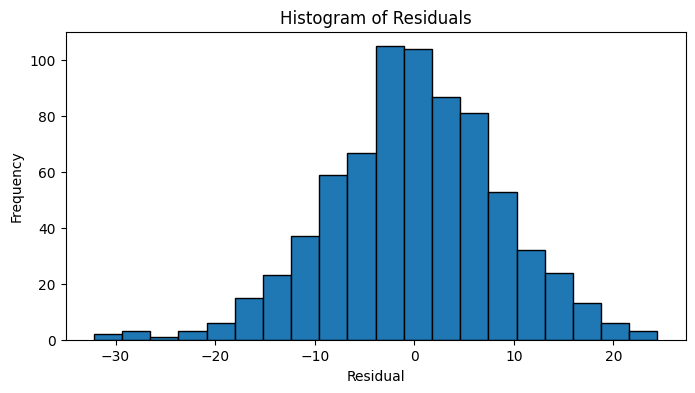

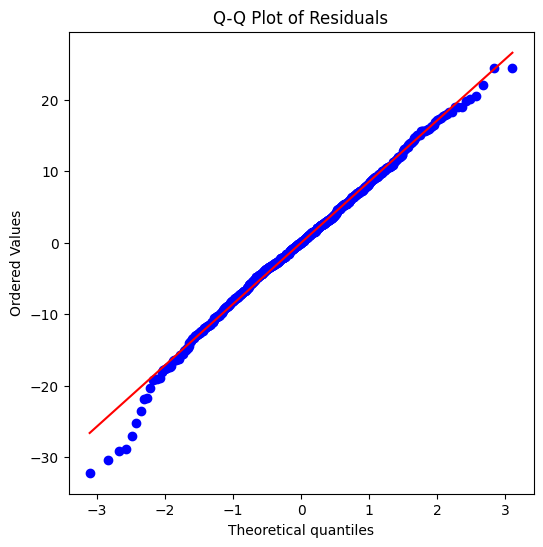

Shapiro-Wilk Test: statistic=0.994, p-value=0.006
Residuals do not appear normally distributed (reject H0).


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Data Preprocessing ---
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in each Section column
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# --- Model ---
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Collect Residuals ---
all_residuals = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Residuals = actual - predicted
    residuals = y_test - y_pred
    all_residuals.extend(residuals)

all_residuals = np.array(all_residuals)

# --- Basic Residual Diagnostics ---
# 1. Histogram
plt.figure(figsize=(8, 4))
plt.hist(all_residuals, bins=20, edgecolor="k")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(all_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Normality Test (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(all_residuals)
print(f"Shapiro-Wilk Test: statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")

# Interpretation of Shapiro-Wilk
if shapiro_p > 0.05:
    print("Residuals appear to come from a normal distribution (fail to reject H0).")
else:
    print("Residuals do not appear normally distributed (reject H0).")

# Polynomial Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print(
    "Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding"
)
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 2)",
            "Approach": "5-Fold CV + one-hot encoding + degree 2",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 2)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding
MAE: 29.1336


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print("Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 2)",
            "Approach": "5-Fold CV + one-hot encoding + degree 2 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 2)
Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped
MAE: 30.4490


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: Full-feature polynomial regression + 5-Fold CV + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 3)",
            "Approach": "5-Fold CV + one-hot encoding + degree 3",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 3)
Approach: Full-feature polynomial regression + 5-Fold CV + one-hot encoding
MAE: 16.6254


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")


# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: 5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 3)",
            "Approach": "5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 3)
Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped
MAE: 17.1186


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: 5-Fold CV + one-hot encoding + degree 4")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 4)",
            "Approach": "5-Fold CV + one-hot encoding + degree 4",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 4)
Approach: 5-Fold CV + one-hot encoding + degree 4
MAE: 15.5107


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "Math-3 Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: 5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 4)",
            "Approach": "5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Polynomial Regression (Order 4)
Approach: 5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped
MAE: 15.5209


### Polynomial Regression: Why We Stop at Degree 4

Polynomial regression was explored to model non-linear patterns in the data. While degree 2 and degree 3 models ran successfully, and **degree 4 was the highest that completed without crashing**, attempting **degree 5 caused a memory blowup**.

Specifically, the number of generated features exceeded **5 million**, requiring over **21 GB of RAM** during cross-validation. This is a result of the **combinatorial explosion** caused by high-degree polynomial feature generation, especially after one-hot encoding categorical variables.

To keep the process computationally feasible and stable, we **cap polynomial regression at degree 4**.


# Support Vector Regression (SVR)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename Div columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in section codes
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)


# Define features and target
target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Build pipeline: Standardize -> SVR
svr_pipeline = make_pipeline(
    StandardScaler(), SVR(kernel="rbf", C=100, gamma="scale", epsilon=0.1)
)

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    svr_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Support Vector Regression (RBF)")
print("Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Support Vector Regression (RBF)",
            "Approach": "5-Fold CV + one-hot encoding + StandardScaler",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Support Vector Regression (RBF)
Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF
MAE: 8.2742


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Read the math train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename Div columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in section codes
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Drop high-VIF columns
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define features and target
target_col = "Math-3 Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Build pipeline: Standardize -> SVR
svr_pipeline = make_pipeline(
    StandardScaler(), SVR(kernel="rbf", C=100, gamma="scale", epsilon=0.1)
)

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(
    svr_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Support Vector Regression (RBF)")
print(
    "Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF kernel + high VIF columns dropped"
)
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame(
    [
        {
            "Model": "Support Vector Regression (RBF)",
            "Approach": "5-Fold CV + one-hot encoding + StandardScaler + RBF kernel + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Support Vector Regression (RBF)
Approach: 5-Fold CV + one-hot encoding + StandardScaler + RBF kernel + high VIF columns dropped
MAE: 8.2850


# Random forest regressor

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
import os
import warnings

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Didn't drop columns with high internal correlation because tree based structures handel them well

# Define target and feature columns
target_col = 'Math-3 Theory'
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Define model pipeline (no preprocessor needed since categorical columns are already encoded)
model = Pipeline(
    steps=[
        ('regressor', RandomForestRegressor(random_state=42)),
    ]
)

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Suppress specific sklearn warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
    neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print('Model: Random Forest Regressor')
print('Approach: Full-feature regression with 5-Fold CV and OneHotEncoding')
print(f'MAE: {mean_mae:.4f}')

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            'Model': 'Random Forest Regressor',
            'Approach': 'Full-feature regression with 5-Fold CV and OneHotEncoding',
            'MAE': round(mean_mae, 4),
        }
    ]
)

log_file = 'model_results_log.csv'
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 6.8736


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='sqrt',
        max_depth=20,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
      "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
                "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.8051


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline with updated hyperparameters
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=5,
        min_samples_leaf=4,
        max_features=None,
        max_depth=None,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, "
      "'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, "
                "'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}
MAE: 6.8434


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline with the specified tuned hyperparameters
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=500,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.5,
        max_depth=None,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, "
      "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, "
                "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}
MAE: 6.7528


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'regressor__n_estimators': [100, 200, 500, 1000],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}


# Use 5-Fold CV for tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_absolute_error',
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X, y)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert back from neg MAE to MAE

# Print results to terminal
print("Model: Random Forest Regressor(tuned)")
print("Parameters:", best_params)
print(f"MAE: {best_score:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": best_params,
    "MAE": round(best_score, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor(tuned)
Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.7841


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Add Semester 1 and 2 percentage features
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename and simplify section columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the tuned Random Forest model
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.5,
        max_depth=30,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, "
      "'max_features': 0.5, 'max_depth': 30}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, "
                "'max_features': 0.5, 'max_depth': 30}",
    "MAE": round(mean_mae, 4)
}])
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 30}
MAE: 6.7535


In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the correct dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Create Semester 1 and 2 percentage features
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename and simplify section columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Handle outliers in target using IQR
target_col = 'Math-3 Theory'
Q1, Q3 = df[target_col].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[~((df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR))]

# Define target and features
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric features
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_distributions = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 3],
    'regressor__max_features': ['sqrt', 0.5, None]
}

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X, y)

# Best model and results
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Feature importances
feature_importances = best_model.named_steps['regressor'].feature_importances_
feature_names = (
    best_model.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
    .tolist() + numeric_cols
)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("Feature Importances:\n", importance_df.sort_values(by='Importance', ascending=False))

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": best_params,
    "MAE": round(best_score, 4)
}])
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

# Output summary
print("Model: Random Forest Regressor (Tuned)")
print("Approach:", best_params)
print(f"MAE: {best_score:.4f}")


Feature Importances:
                                               Feature  Importance
53                                   Sem 2 Percentage    0.155293
32                                      Math-2 Theory    0.118347
33                  Data Structures using Java Theory    0.087378
37   Fundamental of Electronics and Electrical Theory    0.086001
52                                   Sem 1 Percentage    0.077944
23                                     Physics Theory    0.066811
35                                        DBMS Theory    0.053298
22                                      Math-1 Theory    0.047236
27                        Software Engineering Theory    0.039890
36                                     DBMS Practical    0.031186
25                                      Java-1 Theory    0.024594
39                                      Java-2 Theory    0.020092
38  Fundamental of Electronics and Electrical Prac...    0.018204
29                       Environmental Science Theory 

In [21]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.base import BaseEstimator, TransformerMixin

warnings.filterwarnings("ignore")


df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]


# Custom Winsorizer
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.01, upper=0.99):
        self.lower = lower
        self.upper = upper

    def fit(self, X, y=None):
        self.lower_bounds_ = X.quantile(self.lower)
        self.upper_bounds_ = X.quantile(self.upper)
        return self

    def transform(self, X):
        # Must specify axis=1 since our lower/upper bounds have columns as the index
        return X.clip(lower=self.lower_bounds_, upper=self.upper_bounds_, axis=1)


# Features
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]

# Use top 25 features importance list
top_features = [
    "Sem 2 Percentage",
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Sem 1 Percentage",
    "Physics Theory",
    "DBMS Theory",
    "Math-1 Theory",
    "Software Engineering Theory",
    "DBMS Practical",
    "Java-1 Theory",
    "Java-2 Theory",
    "Fundamental of Electronics and Electrical Practical",
    "Environmental Science Theory",
    "Data Structures using Java Practical",
    "Java-2 Attendance",
    "Data Structures using Java Attendance",
    "Software Engineering Attendance",
    "Fundamental of Electronics and Electrical Attendance",
    "Roll-1",
    "Java-1 Attendance",
    "Math-1 Attendance",
    "Math-2 Attendance",
    "Computer Workshop Practical",
    "Physics Attendance",
]

# Add relevant categorical columns (one-hot encoding will handle dummy drop)
top_features += categorical_cols
X = X[top_features]

# Identify numeric columns (excluding categoricals)
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    [
        (
            "num",
            Pipeline([("winsor", Winsorizer()), ("scaler", StandardScaler())]),
            numeric_cols,
        ),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ]
)

# Tuned Random Forest Model
model = Pipeline(
    [
        ("preprocess", preprocessor),
        (
            "regressor",
            RandomForestRegressor(
                n_estimators=1000,
                max_depth=15,
                min_samples_split=5,
                min_samples_leaf=2,
                max_features=0.3,
                bootstrap=True,
                random_state=42,
                n_jobs=-1,
            ),
        ),
    ]
)

# Cross-Validation MAE
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = -1 * cross_val_score(
    model, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15}")
print(f"Mean MAE: {mae_scores.mean():.4f}")

# --- Log Results to CSV ---
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15}",
    "MAE": round(mae_scores.mean(), 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor (Tuned)
Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15}
Mean MAE: 6.7025


# XGBoost

In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the XGBoost pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, verbosity=0))
])

# 5-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: XGBoost Regressor")
print("Approach: Cleaned data, engineered Sem1/Sem2 %, OneHotEncoding, 5-Fold CV")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "XGBoost Regressor",
    "Approach": "Full-feature regression, engineered Sem1/Sem2 %",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: XGBoost Regressor
Approach: Cleaned data, engineered Sem1/Sem2 %, OneHotEncoding, 5-Fold CV
MAE: 7.2612


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# --- 1. Load Dataset ---
df = pd.read_csv("../train_dataset.csv")

# --- 2. Data Cleaning and Feature Engineering ---
# Drop irrelevant or data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "DE Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# Semester 1 core subjects percentage
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects percentage
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns for consistency
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Extract department letters from section columns (e.g., 'A' from 'A1')
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].astype(str).str[0]  # Ensure it's string before slicing

# Define target and features
target_col = "Math-3 Theory"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns for preprocessing
categorical_cols = [
    "Gender",
    "Religion",
    "Branch",
    "Section-1",
    "Section-2",
    "Section-3",
]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# --- 3. Preprocessing Pipeline ---
# Uses OneHotEncoder for categorical features (dropping the first category to avoid multicollinearity)
# and 'passthrough' for numeric features (leaving them as is)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ],
    remainder="passthrough",  # Include remaining columns not specified in transformers
)

# --- 4. Define XGBoost Model Pipeline ---
# Combines the preprocessor with the XGBoost Regressor
# verbosity=0 suppresses XGBoost's verbose output during training
# random_state for reproducibility
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            XGBRegressor(random_state=42, verbosity=0, objective="reg:squarederror"),
        ),  # Specify objective for newer XGBoost versions
    ]
)

# --- 5. Hyperparameter Tuning using GridSearchCV ---
# Define the parameter grid for XGBoost
# These ranges are chosen to explore common effective values for each hyperparameter
param_grid = {
    "regressor__n_estimators": [100, 200, 300],  # Number of boosting rounds
    "regressor__learning_rate": [
        0.01,
        0.05,
        0.1,
    ],  # Step size shrinkage to prevent overfitting
    "regressor__max_depth": [3, 5, 7],  # Maximum depth of a tree
    "regressor__subsample": [0.7, 0.8, 0.9],  # Subsample ratio of the training instance
    "regressor__colsample_bytree": [
        0.7,
        0.8,
        0.9,
    ],  # Subsample ratio of columns when constructing each tree
}

# 5-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
# n_jobs=-1 uses all available CPU cores for faster computation
# scoring='neg_mean_absolute_error' because GridSearchCV minimizes the score, so we use negative MAE
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1,  # Show progress during the search
)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X, y)

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_mae_cv_score = -grid_search.best_score_  # Convert negative MAE back to positive

print(f"Best Parameters: {best_params}")
print(f"Best CV MAE (from GridSearchCV): {best_mae_cv_score:.4f}")

# --- 6. Evaluate the Best Model with Cross-Validation (for final robust MAE) ---
# It's good practice to re-evaluate the best model explicitly with cross_val_score
# to confirm the MAE obtained from GridSearchCV.
neg_mae_scores_best_model = cross_val_score(
    best_model, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_scores_best_model = -neg_mae_scores_best_model
mean_mae_best_model = np.mean(mae_scores_best_model)

# --- 7. Print Results ---
print("Model: XGBoost Regressor (tuned)")
print("Approach: OneHotEncoding + 5-Fold CV" + best_params)
print(f"MAE: {mean_mae_best_model:.4f}")

# --- 8. Log Results ---
results_df_tuned = pd.DataFrame(
    [
        {
            "Model": "XGBoost Regressor",
            "Approach": "OneHotEncoding + 5-Fold CV" + best_params,
            "MAE": round(mean_mae_best_model, 4),
        }
    ]
)

log_file = "model_results_log.csv"
# Check if file exists to decide whether to write header
file_exists = os.path.exists(log_file)
results_df_tuned.to_csv(log_file, mode="a", header=not file_exists, index=False)

Starting GridSearchCV for XGBoost hyperparameter tuning...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
GridSearchCV complete.

--- Best XGBoost Model Details ---
Best Parameters: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.9}
Best CV MAE (from GridSearchCV): 6.6223

Performing 5-Fold Cross-Validation on the best model...

--- Final Results ---
Model: XGBoost Regressor (Fine-tuned)
Approach: Cleaned data, engineered Sem1/Sem2 %, OneHotEncoding, 5-Fold CV, Hyperparameter Tuning
Mean MAE across 5 folds: 6.6720

Results logged to model_results_log.csv
